<a href="https://colab.research.google.com/github/manoharpavuluri/dl-cnn-flowerclassification/blob/main/dl_cnn_flowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # if you want to see image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# below we will use get_file function which takes following arguemens. flower_photos is the directory where the photos will be stored. cache_dir,
#     is where flower_photos needs to be stored, '.' specifying same directory as where this python file is.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [5]:
# lets see if it has jpg files
list(data_dir.glob('*/*.jpg'))

AttributeError: 'str' object has no attribute 'glob'

In [6]:
# in order to see and play with the files in the directory, we need to import pathlib library
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
from prettytable import PrettyTable

def get_folder_extension_counts(directory):
    folder_extension_counts = {}

    for root, dirs, files in os.walk(directory):
        folder_name = os.path.basename(root)
        folder_extension_counts[folder_name] = {'extensions': set(), 'counts': {}}

        for file in files:
            _, extension = os.path.splitext(file)
            extension = extension.lower()  # Convert to lowercase for case-insensitive comparison

            # Update the counts and extensions for the current folder
            folder_extension_counts[folder_name]['extensions'].add(extension)
            folder_extension_counts[folder_name]['counts'][extension] = folder_extension_counts[folder_name]['counts'].get(extension, 0) + 1

    return folder_extension_counts

def display_table(folder_extension_counts):
    table = PrettyTable()
    table.field_names = ["Subfolder Name", "Extension", "Count of Files"]

    for folder, data in folder_extension_counts.items():
        for extension, count in data['counts'].items():
            table.add_row([folder, extension, count])

    print(table)

# Example usage:
directory_path = 'datasets/flower_photos'
folder_extension_counts = get_folder_extension_counts(directory_path)

display_table(folder_extension_counts)


+----------------+-----------+----------------+
| Subfolder Name | Extension | Count of Files |
+----------------+-----------+----------------+
| flower_photos  |    .txt   |       1        |
|     tulips     |    .jpg   |      799       |
|     roses      |    .jpg   |      641       |
|   sunflowers   |    .jpg   |      699       |
|   dandelion    |    .jpg   |      898       |
|     daisy      |    .jpg   |      633       |
+----------------+-----------+----------------+


In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5721768347_2ec4d2247b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg')]

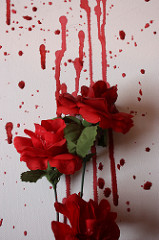

In [13]:
#if you want to see a image, use PIL lib

PIL.Image.open(str(roses[5]))



In [18]:
flower_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'daisy' : list(data_dir.glob('daisy/*'))
}

In [19]:
flower_image_dict['roses']

[PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5721768347_2ec4d2247b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20825078671_90b0389c70_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6687138903_ff6ae12758_n.jpg'),
 PosixPath('datasets/flower_photos/roses/388405293_4db1d71f21_n.jpg'),
 PosixPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7376473742_532364cee5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg'),
 PosixPath('datasets/flower_photos/roses/7420699022_60fa574524_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_

In [20]:
flower_labels_dict = {
    'roses' : 0,
    'tulips' : 1,
    'sunflowers' : 2,
    'dandelion' : 3,
    'daisy' : 4
}

In [23]:
img = cv2.imread(flower_image_dict['roses'])

TypeError: Can't convert object to 'str' for 'filename'

In [27]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img


array([[[254, 247, 244],
        [254, 247, 244],
        [254, 248, 243],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[251, 245, 240],
        [252, 246, 241],
        [252, 246, 241],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[250, 244, 237],
        [250, 244, 237],
        [251, 245, 238],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [253, 253, 253]],

       ...,

       [[112, 168, 193],
        [107, 161, 184],
        [118, 166, 190],
        ...,
        [ 12,   8,   3],
        [ 18,  13,  10],
        [ 29,  22,  29]],

       [[ 24,  39,  78],
        [ 12,  26,  55],
        [ 13,  24,  44],
        ...,
        [  8,   3,   5],
        [ 10,   5,   7],
        [ 18,  13,  10]],

       [[ 23,  13,  30],
        [ 20,  12,  23],
        [ 21,  15,  20],
        ...,
        [  0,   3,   8],
        [  2,   6,  11],
        [ 13,  18,   9]]

In [29]:
img.shape

(240, 238, 3)

In [31]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []
for flower_name